# **Best city to live**

## Data Preprocessing

In an increasingly interconnected world, choosing the best city to live in involves a multifaceted decision-making process. Individuals and families consider various factors such as air quality, educational success, safety, cleanliness, recreational activities, and infrastructure when determining the most suitable place to settle. This project aims to analyze and compare these factors across different cities to identify which ones offer the highest quality of life.

### Objective, Data collection and Preprocessing

***Project Objectives***

The primary objective of this project was to perform a comprehensive data analysis to rank cities based on several key indicators that contribute to the quality of life. These indicators include:

- **Housing**: Rating about afforability of houses in the city.
- **Cost of Living**: The expense of living in the city.
- **Startups**: The presence or number of startup companies in the city.
- **Travel Connectivity**: The ease of travel to and from the city, including transportation infrastructure and connectivity.
- **Commute**: The average time and ease of commuting within the city.
- **Business Freedom**: The level of freedom to conduct business activities in the city.
- **Safety**: The safety and security level in the city.
- **Healthcare**: The quality and availability of healthcare services in the city.
- **Education**: The quality and availability of educational institutions and services in the city.
- **Environmental Quality**: The quality of the environment in the city, including pollution levels and green spaces.
- **Economy**: The economic strength and stability of the city, including job opportunities and economic growth.
- **Leisure & Culture**: The availability and quality of leisure and cultural activities in the city.
- **Tolerance**: The level of tolerance and acceptance of diversity in the city.
- **Outdoors**: The availability and quality of outdoor activities and natural environments in and around the city.
- **AQI Value**: The Air Quality Index value, indicating the level of air pollution in the city.

***Data Collection***

To achieve these objectives, data was collected from [Kaggle](https://kaggle.com), which collected the data from various reputable sources:
- World Air Quality Index (WAQI)
- World Health Organization (WHO)
- Numbeo

***Data Preprocessing***

The collected data was preprocessed to ensure accuracy and consistency.

### Index

**Content**
1. [Libraries.](#Libraries)
2. [Reading the datasets.](#Reading-the-datasets)
3. [Pre-processing: Repair columns, treatment of nulls and outliers:](#Pre-processing:-Repair-columns,-treatment-of-nulls-and-outliers)
    - [City Quality of life dataset.](#dataset-city_quality_of_life)
    - [City world air quality index dataset.](#dataset-city_world_air_quality_indexLat_Long)
    - [Combined datasets.](#combined-datasets)
    - [Country world happinness report 2024.](#dataset-country_world_happiness_report_2024)
    - [Country world happiness report all years dataset.](#dataset-country_world_happiness_report_all_years)
4. [Save the datasets](#save-the-datasets)

### Libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the datasets:

In [3]:
df1 = pd.read_csv("..\data\city_quality_of_life.csv", encoding='latin-1')
df2 = pd.read_csv("..\data\city_world_air_quality_index_Lat_Long.csv", encoding='latin-1')
df3 = pd.read_csv("..\data\country_world_happiness_report_2024.csv", encoding='latin-1')
df4 = pd.read_csv("..\data\country_world_happiness_report_all_years.csv", encoding='latin-1')

In [4]:
print('city_quality_of_life:', df1.shape)
print('city_world_air_quality_index_Lat_Long:', df2.shape)
print('country_world_happiness_report_2024:', df3.shape)
print('country_world_happiness_report_all_years:', df4.shape)

city_quality_of_life: (266, 21)
city_world_air_quality_index_Lat_Long: (16695, 14)
country_world_happiness_report_2024: (143, 12)
country_world_happiness_report_all_years: (2363, 11)


In [5]:
# To show all coumns and rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Pre-processing: Repair columns, treatment of nulls and outliers

#### Dataset 'city_quality_of_life' 

In [6]:
df1.head(2)

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.130
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.531


In [7]:
# I do a copy to keep the original dataset
df1_cleaned = df1.copy()

In [8]:
df1_cleaned.shape

(266, 21)

In [9]:
df1_cleaned = df1_cleaned.drop(columns=['Unnamed: 0'])
df1_cleaned = df1_cleaned.rename(columns={'UA_Name': 'City', 'UA_Country':'Country', 'UA_Continent':'Continent'})

In [10]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   266 non-null    object 
 1   Country                266 non-null    object 
 2   Continent              266 non-null    object 
 3   Housing                266 non-null    float64
 4   Cost of Living         266 non-null    float64
 5   Startups               266 non-null    float64
 6   Venture Capital        266 non-null    float64
 7   Travel Connectivity    266 non-null    float64
 8   Commute                266 non-null    float64
 9   Business Freedom       266 non-null    float64
 10  Safety                 266 non-null    float64
 11  Healthcare             266 non-null    float64
 12  Education              266 non-null    float64
 13  Environmental Quality  266 non-null    float64
 14  Economy                266 non-null    float64
 15  Taxati

In [11]:
df1_cleaned.duplicated().sum()

0

In [12]:
# I delete the empty space before the name of the cities and countries:

df1_cleaned['Country'] = df1_cleaned['Country'].str.strip()
df1_cleaned['City'] = df1_cleaned['City'].str.strip()

In [13]:
duplicated_cities = df1_cleaned[df1_cleaned.duplicated('City', keep=False)]
duplicate_city_countries = duplicated_cities.groupby('City')['Country'].unique()
print("Duplicated cities and their respective countries:")
for city, countries in duplicate_city_countries.items():
    print(f"{city}: {', '.join(countries)}")

Duplicated cities and their respective countries:
Birmingham: United Kingdom, Alabama
Portland: Maine, Oregon


In [14]:
df1_cleaned['Country'].unique()
country_lista = list(df1_cleaned['Country'].unique())
sorted(country_lista)

['Alabama',
 'Alaska',
 'Andorra',
 'Argentina',
 'Arizona',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Belize',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'California',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Colorado',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'District of Columbia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Finland',
 'Florida',
 'France',
 'Georgia',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guatemala',
 'Hawaii',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'Idaho',
 'Illinois',
 'India',
 'Indiana',
 'Indonesia',
 'Iowa',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kentucky',
 'Kenya',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Louisiana',
 'Luxembourg',
 'Macedonia',
 'Maine',
 'Malaysia',
 'Malta',
 'Maryland',
 'Massachusetts',
 'Mexico',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Moldova',
 'Montana'

In [15]:
state_dict = {
    'Alaska': 'United States',
    'Alabama': 'United States',
    'Texas': 'United States',
    'Maryland': 'United States',
    'Massachusetts': 'United States',
    'Colorado': 'United States',
    'Montana': 'United States',
    'New York': 'United States',
    'California': 'United States',
    'South Carolina': 'United States',
    'Tennessee': 'United States',
    'Illinois': 'United States',
    'Ohio': 'United States',
    'Florida': 'United States',
    'Hawaii': 'United States',
    'Indiana': 'United States',
    'Missouri': 'United States',
    'Nevada': 'United States',
    'Oregon': 'United States',
    'Michigan': 'United States',
    'Virginia': 'United States',
    'Pennsylvania': 'United States',
    'Arizona': 'United States',
    'Maine': 'United States',
    'Rhode Island': 'United States',
    'Washington': 'United States',
    'Louisiana': 'United States',
    'Oklahoma': 'United States',
    'Nebraska': 'United States',
    'Kentucky': 'United States',
    'Wisconsin': 'United States',
    'North Carolina': 'United States',
    'South Dakota': 'United States',
    'New Jersey': 'United States',
    'West Virginia': 'United States',
    'Georgia': 'United States',
    'Arkansas': 'United States',
    'Minnesota': 'United States',
    'Iowa': 'United States',
    'Mississippi': 'United States',
    'Idaho': 'United States',
    'Connecticut': 'United States',
    'New Mexico' : 'United States',
    'District of Columbia': 'United States'
}

df1_cleaned['Country'] = df1_cleaned['Country'].replace(state_dict)

df1_cleaned.head(5)


,City,Country,Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,Albuquerque,United States,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [16]:
# I check that all the states from USA are now appearing as "United States":
df1_cleaned['Country'].unique()

array(['Denmark', 'Australia', 'United States', 'Kazakhstan',
       'Netherlands', 'Andorra', 'Turkey', 'Paraguay', 'Greece',
       'New Zealand', 'Azerbaijan', 'Indonesia', 'Thailand', 'Spain',
       'China', 'Lebanon', 'United Kingdom', 'Serbia', 'Belize', 'India',
       'Norway', 'Germany', 'Switzerland', 'Colombia', 'Italy', 'France',
       'Slovakia', 'Czechia', 'Belgium', 'Romania', 'Hungary',
       'Argentina', 'Egypt', 'Canada', 'South Africa', 'Venezuela',
       'Morocco', 'Moldova', 'Ireland', 'Brazil', 'Tanzania', 'Qatar',
       'United Arab Emirates', 'Japan', 'Poland', 'Gibraltar', 'Sweden',
       'Mexico', 'Guatemala', 'Cuba', 'Finland', 'Vietnam', 'Hong Kong',
       'Austria', 'Nepal', 'Ukraine', 'Jamaica', 'Malaysia', 'Nigeria',
       'Bolivia', 'Peru', 'Portugal', 'Slovenia', 'Luxembourg',
       'Nicaragua', 'Philippines', 'Belarus', 'Uruguay', 'Russia',
       'Kenya', 'Cyprus', 'Panama', 'Cambodia', 'Ecuador', 'Iceland',
       'Latvia', 'Saudi Arabia', '

In [17]:
europe_countries = df1_cleaned[df1_cleaned['Continent'] == 'Europe'][['Country', 'Continent']]
# I delete duplicates to obtain the list of countries of Europe
europe_countries_unique = europe_countries.drop_duplicates()
print(europe_countries_unique)


                    Country Continent
0                   Denmark    Europe
4               Netherlands    Europe
6                   Andorra    Europe
10                   Greece    Europe
18                    Spain    Europe
21           United Kingdom    Europe
22                   Serbia    Europe
25                   Norway    Europe
26                  Germany    Europe
27              Switzerland    Europe
33                    Italy    Europe
34                   France    Europe
38                 Slovakia    Europe
42                  Czechia    Europe
43                  Belgium    Europe
44                  Romania    Europe
45                  Hungary    Europe
61                  Moldova    Europe
70                  Ireland    Europe
93                   Poland    Europe
95                Gibraltar    Europe
97                   Sweden    Europe
105                 Finland    Europe
112                 Austria    Europe
120                 Ukraine    Europe
135         

In [18]:
# I need to change the continent for "Unites States" and "Canada" because there's a mistake:

df1_cleaned.loc[df1_cleaned['Country'] == 'United States', 'Continent'] = 'North America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Canada', 'Continent'] = 'North America'

# I check that it was changed:
europe_countries = df1_cleaned[df1_cleaned['Continent'] == 'Europe'][['City', 'Continent']]

print(europe_countries)


                           City Continent
0                        Aarhus    Europe
4                     Amsterdam    Europe
6                       Andorra    Europe
10                       Athens    Europe
18                    Barcelona    Europe
21                      Belfast    Europe
22                     Belgrade    Europe
25                       Bergen    Europe
26                       Berlin    Europe
27                         Bern    Europe
28                       Bilbao    Europe
29                   Birmingham    Europe
33                      Bologna    Europe
34                     Bordeaux    Europe
38                   Bratislava    Europe
39                     Brighton    Europe
41                      Bristol    Europe
42                         Brno    Europe
43                     Brussels    Europe
44                    Bucharest    Europe
45                     Budapest    Europe
50                    Cambridge    Europe
53                      Cardiff   

In [19]:
df1_cleaned['Continent'].unique()

array(['Europe', 'Oceania', 'North America', 'Asia', 'South America',
       'Africa'], dtype=object)

In [20]:
# I check the countries for North America:
NA_countries = df1_cleaned[df1_cleaned['Continent'] == 'North America'][['Country', 'Continent']]
NA_countries_unique = NA_countries.drop_duplicates()
print(NA_countries_unique)

                Country      Continent
2         United States  North America
23               Belize  North America
49               Canada  North America
99               Mexico  North America
100           Guatemala  North America
104                Cuba  North America
121             Jamaica  North America
148           Nicaragua  North America
183              Panama  North America
209                Utah  North America
213          Costa Rica  North America
214         Puerto Rico  North America
216         El Salvador  North America
218  Dominican Republic  North America


In [21]:
# I need to change the continent for some of above countries because there's a mistake:

df1_cleaned.loc[df1_cleaned['Country'] == 'Belize', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Guatemala', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Cuba', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Jamaica', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Nicaragua', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Panama', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Costa Rica', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Puerto Rico', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'El Salvador', 'Continent'] = 'Central America'
df1_cleaned.loc[df1_cleaned['Country'] == 'Dominican Republic', 'Continent'] = 'Central America'

# I check that it was changed:
NA_countries = df1_cleaned[df1_cleaned['Continent'] == 'North America'][['Country', 'Continent']]

# I delete duplicates to obtain the list of countries of Europe
NA_countries_unique = NA_countries.drop_duplicates()

print(NA_countries_unique)

           Country      Continent
2    United States  North America
49          Canada  North America
99          Mexico  North America
209           Utah  North America


I will do the maps of each continent to quickly check if all the countries are okay:

#### Dataset 'city_world_air_quality_index_Lat_Long' 

In [22]:
# I do a copy to keep the original dataset
df2_cleaned = df2.copy()

In [23]:
df2_cleaned.shape

(16695, 14)

In [24]:
df2_cleaned.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [25]:
# I found that there are cities with duplicated lat and longitude:

city_lat_lng = df2_cleaned[['City', 'lat', 'lng']]
print(city_lat_lng)

                                 City      lat       lng
0                          Praskoveya  44.7444   44.2031
1                    Presidente Dutra  -5.2900  -44.4900
2                    Presidente Dutra -11.2958  -41.9869
3                     Priolo Gargallo  37.1667   15.1833
4                           Przasnysz  53.0167   20.8833
5                         Punta Gorda  16.1005  -88.8074
6                         Punta Gorda  26.8941  -82.0513
7                               Puurs  51.0761    4.2803
8                          Pyatigorsk  44.0500   43.0667
9                             Qinzhou  21.9500  108.6167
10                             Raalte  52.3833    6.2667
11                            Raismes  50.3892    3.4858
12                            Ramacca  37.3833   14.7000
13                            Phoenix  33.5722 -112.0892
14                          Piaseczno  52.0667   21.0167
15                          Pinheiral -22.5128  -44.0008
16                             

In [26]:
# I will remove duplicated cities
df2_cleaned = df2_cleaned.drop_duplicates(subset=['City'])

In [27]:
city_lat_lng = df2_cleaned[['City', 'lat', 'lng']]
print(city_lat_lng)

                                 City      lat       lng
0                          Praskoveya  44.7444   44.2031
1                    Presidente Dutra  -5.2900  -44.4900
3                     Priolo Gargallo  37.1667   15.1833
4                           Przasnysz  53.0167   20.8833
5                         Punta Gorda  16.1005  -88.8074
7                               Puurs  51.0761    4.2803
8                          Pyatigorsk  44.0500   43.0667
9                             Qinzhou  21.9500  108.6167
10                             Raalte  52.3833    6.2667
11                            Raismes  50.3892    3.4858
12                            Ramacca  37.3833   14.7000
13                            Phoenix  33.5722 -112.0892
14                          Piaseczno  52.0667   21.0167
15                          Pinheiral -22.5128  -44.0008
16                              Plato   9.7919  -74.7872
17                        Poiana Mare  43.9333   23.0833
18                          Pol

In [28]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14229 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13956 non-null  object 
 1   City                14229 non-null  object 
 2   AQI Value           14229 non-null  int64  
 3   AQI Category        14229 non-null  object 
 4   CO AQI Value        14229 non-null  int64  
 5   CO AQI Category     14229 non-null  object 
 6   Ozone AQI Value     14229 non-null  int64  
 7   Ozone AQI Category  14229 non-null  object 
 8   NO2 AQI Value       14229 non-null  int64  
 9   NO2 AQI Category    14229 non-null  object 
 10  PM2.5 AQI Value     14229 non-null  int64  
 11  PM2.5 AQI Category  14229 non-null  object 
 12  lat                 14229 non-null  float64
 13  lng                 14229 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [29]:
# I keep only the desired columns:
df2_cleaned = df2_cleaned[['Country', 'City', 'AQI Value', 'AQI Category', 'lat', 'lng']]

In [30]:
df2_cleaned.to_csv('city_world_AQI.csv', index=False)

In [31]:
df2_cleaned.isnull().sum() # I will merge this table with the other one, so I will check the countries after the merge.

Country         273
City              0
AQI Value         0
AQI Category      0
lat               0
lng               0
dtype: int64

In [32]:
# I check both tables before merging

In [33]:
df1_cleaned.head(5)

,City,Country,Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,Albuquerque,United States,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [34]:
df1_cleaned.shape

(266, 20)

In [35]:
df2_cleaned.head()

,Country,City,AQI Value,AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,16.1005,-88.8074


In [36]:
df2_cleaned.shape

(14229, 6)

In [37]:
unique_countries = sorted(df1_cleaned['Country'].astype(str).unique())
for country in unique_countries:
    print(country)

Andorra
Argentina
Armenia
Australia
Austria
Azerbaijan
Belarus
Belgium
Belize
Bolivia
Bosnia and Herzegovina
Brazil
Bulgaria
Cambodia
Canada
Chile
China
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Finland
France
Germany
Gibraltar
Greece
Guatemala
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Ireland
Israel
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lithuania
Luxembourg
Macedonia
Malaysia
Malta
Mexico
Moldova
Morocco
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
Norway
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russia
Saudi Arabia
Serbia
Singapore
Slovakia
Slovenia
South Africa
South Korea
Spain
Sweden
Switzerland
Taiwan
Tanzania
Thailand
Tunisia
Turkey
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Utah
Uzbekistan
Venezuela
Vietnam


In [38]:
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Iran (Islamic Republic of)', 'Iran') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Korea', 'South Korea') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Republic of Moldova', 'Moldova') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Republic of North Macedonia', 'Macedonia') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Russian Federation', 'Russia') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df2_cleaned['Country'] = df2_cleaned['Country'].replace('United Republic of Tanzania', 'Tanzania')
df2_cleaned['Country'] = df2_cleaned['Country'].replace('United States of America', 'United States') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela') 
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Viet Nam', 'Vietnam')
df2_cleaned['Country'] = df2_cleaned['Country'].replace('Democratic Republic of the Congo', 'Congo')

In [39]:
unique_countries = sorted(df2_cleaned['Country'].astype(str).unique())
for country in unique_countries:
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
CÃ´te d'Ivoire
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kingdom of Eswatini
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands

#### Combined Datasets cities

In [40]:
city_df = pd.merge(df1_cleaned, df2_cleaned, on=['City', 'Country'], how='left')
city_df.head()

,City,Country,Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,AQI Value,AQI Category,lat,lng
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,NaN,NaN,NaN,NaN
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310,44.0,Good,-34.9275,138.6000
2,Albuquerque,United States,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155,63.0,Moderate,35.1054,-106.6465
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000,83.0,Moderate,43.2775,76.8958
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,38.0,Good,52.3728,4.8936


In [41]:
city_df.shape

(266, 24)

In [42]:
# I check if there are duplicated cities:
city_country_df = city_df[['City', 'Country']]
city_country_df 

,City,Country
0,Aarhus,Denmark
1,Adelaide,Australia
2,Albuquerque,United States
3,Almaty,Kazakhstan
4,Amsterdam,Netherlands
5,Anchorage,United States
6,Andorra,Andorra
7,Ankara,Turkey
8,Asheville,United States
9,Asuncion,Paraguay


In [43]:
duplicated_cities = city_df[city_df.duplicated('City', keep=False)]

duplicate_city_countries = duplicated_cities.groupby('City')['Country'].unique()

print("Ciudades duplicadas y sus países correspondientes:")

for city, countries in duplicate_city_countries.items():
    print(f"{city}: {', '.join(countries)}")


Ciudades duplicadas y sus países correspondientes:
Birmingham: United Kingdom, United States
Portland: United States


In [44]:
# I delete Portland because is duplicated:
city_df = city_df.drop(191)


In [45]:
# I will change the names of the cities of Birmingham to distinguish between US and UK:
data = {
    'City': ['Birmingham', 'Birmingham'],
    'Country': ['United Kingdom', 'United States']
}

city_df.loc[(city_df['City'] == 'Birmingham') & (city_df['Country'] == 'United Kingdom'), 'City'] = 'Birmingham UK'
city_df.loc[(city_df['City'] == 'Birmingham') & (city_df['Country'] == 'United States'), 'City'] = 'Birmingham US'

In [46]:
city_df.head()

,City,Country,Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,AQI Value,AQI Category,lat,lng
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,NaN,NaN,NaN,NaN
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310,44.0,Good,-34.9275,138.6000
2,Albuquerque,United States,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155,63.0,Moderate,35.1054,-106.6465
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000,83.0,Moderate,43.2775,76.8958
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,38.0,Good,52.3728,4.8936


In [47]:
city_df.shape

(265, 24)

##### Treatment of nulls

In [48]:
city_df.isnull().sum()

City                      0
Country                   0
Continent                 0
Housing                   0
Cost of Living            0
Startups                  0
Venture Capital           0
Travel Connectivity       0
Commute                   0
Business Freedom          0
Safety                    0
Healthcare                0
Education                 0
Environmental Quality     0
Economy                   0
Taxation                  0
Internet Access           0
Leisure & Culture         0
Tolerance                 0
Outdoors                  0
AQI Value                98
AQI Category             98
lat                      98
lng                      98
dtype: int64

In [49]:
paises_con_AQI_nulos = city_df[city_df['AQI Value'].isnull()]['Country'].unique()

print("Paises con AQI Value nulos:")
for pais in paises_con_AQI_nulos:
    print(pais)

Paises con AQI Value nulos:
Denmark
Andorra
Paraguay
Greece
Indonesia
Spain
China
Belize
India
Norway
Germany
United Kingdom
United States
Argentina
New Zealand
Romania
Tanzania
Ireland
Italy
Brazil
Japan
Poland
Gibraltar
Sweden
Mexico
Canada
Cuba
Hong Kong
Ukraine
Jamaica
Nigeria
Bolivia
Luxembourg
Colombia
Australia
Russia
Cyprus
Panama
France
Cambodia
Iceland
Utah
Costa Rica
Puerto Rico
Chile
Dominican Republic
South Korea
Taiwan
Iran
Israel
Malta
Austria
Switzerland


In [50]:
# To replace the country missing values with the average AQI of that country assign to other cities:

# I calculate the average "AQI Value" per country:
aqi_value_promedio = df2.groupby('Country')['AQI Value'].transform('mean')

# I calculate the mode of "AQI Category" per country:
aqi_category_moda = df2.groupby('Country')['AQI Category'].transform(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else None)

# I replace the missing values in "AQI Value" and "AQI Category" by the average and mode already calculated before:
city_df['AQI Value'] = city_df['AQI Value'].fillna(aqi_value_promedio)
city_df['AQI Category'] = city_df['AQI Category'].fillna(aqi_category_moda)

city_df.head(5)

,City,Country,Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,AQI Value,AQI Category,lat,lng
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,42.227222,Good,NaN,NaN
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310,44.000000,Good,-34.9275,138.6000
2,Albuquerque,United States,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155,63.000000,Moderate,35.1054,-106.6465
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000,83.000000,Moderate,43.2775,76.8958
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,38.000000,Good,52.3728,4.8936


In [51]:
city_df.isnull().sum()

City                      0
Country                   0
Continent                 0
Housing                   0
Cost of Living            0
Startups                  0
Venture Capital           0
Travel Connectivity       0
Commute                   0
Business Freedom          0
Safety                    0
Healthcare                0
Education                 0
Environmental Quality     0
Economy                   0
Taxation                  0
Internet Access           0
Leisure & Culture         0
Tolerance                 0
Outdoors                  0
AQI Value                 0
AQI Category              0
lat                      98
lng                      98
dtype: int64

In [52]:
# Columns 'lat' or 'lng' have missing values:
ciudades_con_valores_faltantes = city_df[city_df['lat'].isna() | city_df['lng'].isna()]

print("Ciudades con valores faltantes en latitud o longitud:")
print(ciudades_con_valores_faltantes[['City', 'Country', 'lat', 'lng']])

Ciudades con valores faltantes en latitud o longitud:
                           City             Country  lat  lng
0                        Aarhus             Denmark  NaN  NaN
6                       Andorra             Andorra  NaN  NaN
9                      Asuncion            Paraguay  NaN  NaN
10                       Athens              Greece  NaN  NaN
15                         Bali           Indonesia  NaN  NaN
18                    Barcelona               Spain  NaN  NaN
19                      Beijing               China  NaN  NaN
23                  Belize City              Belize  NaN  NaN
24                    Bengaluru               India  NaN  NaN
25                       Bergen              Norway  NaN  NaN
26                       Berlin             Germany  NaN  NaN
29                Birmingham UK      United Kingdom  NaN  NaN
32                        Boise       United States  NaN  NaN
41                      Bristol      United Kingdom  NaN  NaN
46              

In [53]:
# I create a dictionary to assign the missing latitudes and longitudes:

diccionario_lat_lng = {
    'Aarhus': {'lat': 56.1629, 'lng': 10.2039},
    'Andorra': {'lat': 42.5063, 'lng': 1.5218},
    'Asuncion': {'lat': -25.2637, 'lng': -57.5759},
    'Athens': {'lat': 37.9838, 'lng': 23.7275},
    'Bali': {'lat': -8.4095, 'lng': 115.1889},
    'Barcelona': {'lat': 41.3851, 'lng': 2.1734},
    'Beijing': {'lat': 39.9042, 'lng': 116.4074},
    'Belize City': {'lat': 17.4983, 'lng': -88.1882},
    'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
    'Bergen': {'lat': 60.3913, 'lng': 5.3221},
    'Berlin': {'lat': 52.5200, 'lng': 13.4050},
    'Birmingham UK': {'lat': 52.4862, 'lng': -1.8904},
    'Boise': {'lat': 43.6150, 'lng': -116.2023},
    'Bristol': {'lat': 51.4545, 'lng': -2.5879},
    'Buenos Aires': {'lat': -34.6037, 'lng': -58.3816},
    'Cardiff': {'lat': 51.4816, 'lng': -3.1791},
    'Chennai': {'lat': 13.0827, 'lng': 80.2707},
    'Christchurch': {'lat': -43.5321, 'lng': 172.6362},
    'Cluj-Napoca': {'lat': 46.7712, 'lng': 23.6236},
    'Copenhagen': {'lat': 55.6761, 'lng': 12.5683},
    'Dar es Salaam': {'lat': -6.7924, 'lng': 39.2083},
    'Dublin': {'lat': 53.3498, 'lng': -6.2603},
    'Dusseldorf': {'lat': 51.2277, 'lng': 6.7735},
    'Florence': {'lat': 43.7696, 'lng': 11.2558},
    'Florianopolis': {'lat': -27.5954, 'lng': -48.5480},
    'Fukuoka': {'lat': 33.5904, 'lng': 130.4017},
    'Gdansk': {'lat': 54.3520, 'lng': 18.6466},
    'Gibraltar': {'lat': 36.1408, 'lng': -5.3536},
    'Glasgow': {'lat': 55.8642, 'lng': -4.2518},
    'Gothenburg': {'lat': 57.7089, 'lng': 11.9746},
    'Guadalajara': {'lat': 20.6597, 'lng': -103.3496},
    'Halifax': {'lat': 44.6488, 'lng': -63.5752},
    'Hannover': {'lat': 52.3759, 'lng': 9.7320},
    'Havana': {'lat': 23.1136, 'lng': -82.3666},
    'Hong Kong': {'lat': 22.3193, 'lng': 114.1694},
    'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
    'Kiev': {'lat': 50.4501, 'lng': 30.5234},
    'Kingston': {'lat': 18.0179, 'lng': -76.8099},
    'Krakow': {'lat': 50.0647, 'lng': 19.9450},
    'Kyoto': {'lat': 35.0116, 'lng': 135.7681},
    'Lagos': {'lat': 6.5244, 'lng': 3.3792},
    'La Paz': {'lat': -16.5000, 'lng': -68.1500},
    'Las Palmas de Gran Canaria': {'lat': 28.1236, 'lng': -15.4362},
    'Leeds': {'lat': 53.8008, 'lng': -1.5491},
    'Luxembourg': {'lat': 49.6117, 'lng': 6.1296},
    'Lviv': {'lat': 49.8397, 'lng': 24.0297},
    'Madrid': {'lat': 40.4168, 'lng': -3.7038},
    'Malaga': {'lat': 36.7213, 'lng': -4.4214},
    'Malmo': {'lat': 55.6049, 'lng': 13.0038},
    'Manchester': {'lat': 53.4839, 'lng': -2.2446},
    'Medellin': {'lat': 6.2442, 'lng': -75.5812},
    'Melbourne': {'lat': -37.8136, 'lng': 144.9631},
    'Mexico City': {'lat': 19.4326, 'lng': -99.1332},
    'Minneapolis-Saint Paul': {'lat': 44.9778, 'lng': -93.2650},
    'Montreal': {'lat': 45.5017, 'lng': -73.5673},
    'Moscow': {'lat': 55.7558, 'lng': 37.6176},
    'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
    'Naples': {'lat': 40.8518, 'lng': 14.2681},
    'New York': {'lat': 40.7128, 'lng': -74.0060},
    'Nicosia': {'lat': 35.1856, 'lng': 33.3823},
    'Osaka': {'lat': 34.6937, 'lng': 135.5023},
    'Ottawa': {'lat': 45.4215, 'lng': -75.6919},
    'Oxford': {'lat': 51.7520, 'lng': -1.2577},
    'Panama': {'lat': 8.9824, 'lng': -79.5199},
    'Paris': {'lat': 48.8566, 'lng': 2.3522},
    'Perth': {'lat': -31.9505, 'lng': 115.8605},
    'Phnom Penh': {'lat': 11.5564, 'lng': 104.9282},
    'Quebec': {'lat': 46.8139, 'lng': -71.2080},
    'Reykjavik': {'lat': 64.1355, 'lng': -21.8954},
    'Rio De Janeiro': {'lat': -22.9068, 'lng': -43.1729},
    'Rome': {'lat': 41.9028, 'lng': 12.4964},
    'Saint Petersburg': {'lat': 59.9343, 'lng': 30.3351},
    'Salt Lake City': {'lat': 40.7608, 'lng': -111.8910},
    'San Antonio': {'lat': 29.4241, 'lng': -98.4936},
    'San Diego': {'lat': 32.7157, 'lng': -117.1611},
    'San Francisco Bay Area': {'lat': 37.7749, 'lng': -122.4194},
    'San Jose': {'lat': 9.9281, 'lng': -84.0907},
    'San Juan': {'lat': 18.4655, 'lng': -66.1057},
    'Santiago': {'lat': -33.4489, 'lng': -70.6693},
    'Santo Domingo': {'lat': 18.4861, 'lng': -69.9312},
    'Sao Paulo': {'lat': -23.5505, 'lng': -46.6333},
    'Seoul': {'lat': 37.5665, 'lng': 126.9780},
    'Seville': {'lat': 37.3891, 'lng': -5.9845},
    'St. Louis': {'lat': 38.6270, 'lng': -90.1994},
    'Stockholm': {'lat': 59.3293, 'lng': 18.0686},
    'Taipei': {'lat': 25.0330, 'lng': 121.5654},
    'Tampa Bay Area': {'lat': 27.9506, 'lng': -82.4572},
    'Tbilisi': {'lat': 41.7151, 'lng': 44.8271},
    'Tehran': {'lat': 35.6892, 'lng': 51.3890},
    'Tel Aviv': {'lat': 32.0853, 'lng': 34.7818},
    'Thessaloniki': {'lat': 40.6401, 'lng': 22.9444},
    'Valencia': {'lat': 39.4699, 'lng': -0.3763},
    'Valletta': {'lat': 35.8997, 'lng': 14.5147},
    'Vancouver': {'lat': 49.2827, 'lng': -123.1207},
    'Victoria': {'lat': 48.4284, 'lng': -123.3656},
    'Vienna': {'lat': 48.2082, 'lng': 16.3738},
    'Wroclaw': {'lat': 51.1079, 'lng': 17.0385},
    'Zurich': {'lat': 47.3769, 'lng': 8.5417}
}


for city, coords in diccionario_lat_lng.items():
    city_df.loc[(city_df['City'] == city) & (city_df['lat'].isnull()), 'lat'] = coords['lat']
    city_df.loc[(city_df['City'] == city) & (city_df['lng'].isnull()), 'lng'] = coords['lng']

In [54]:
# I double check the null values:

city_df.isnull().sum()

City                     0
Country                  0
Continent                0
Housing                  0
Cost of Living           0
Startups                 0
Venture Capital          0
Travel Connectivity      0
Commute                  0
Business Freedom         0
Safety                   0
Healthcare               0
Education                0
Environmental Quality    0
Economy                  0
Taxation                 0
Internet Access          0
Leisure & Culture        0
Tolerance                0
Outdoors                 0
AQI Value                0
AQI Category             0
lat                      0
lng                      0
dtype: int64

In [55]:
# I check if there's any duplicated city:
duplicated_cities = city_df[city_df.duplicated('City', keep=False)]

duplicate_city_names = duplicated_cities['City'].unique()

print("Nombres de ciudades duplicadas:")
print(duplicate_city_names)

Nombres de ciudades duplicadas:
[]


In [56]:
# I check if there's any duplicated city:
duplicated_cities = city_df[city_df.duplicated('City', keep=False)]

# I check to which country it belongs each city
duplicate_city_countries = duplicated_cities.groupby('City')['Country'].unique()

print("Ciudades duplicadas y sus países correspondientes:")

for city, countries in duplicate_city_countries.items():
    print(f"{city}: {', '.join(countries)}")

Ciudades duplicadas y sus países correspondientes:


When doing the below graphs of the maps per continent to quickly check if all countries/cities are within the correct continent, I realized that there's one latitude and longitude which is incorrect. I will fix it.

In [57]:
city_df.loc[(city_df['City'] == 'Cambridge') & (city_df['Country'] == 'United Kingdom'), ['lat', 'lng']] = [52.2053, 0.1218]
city_df.loc[(city_df['City'] == 'Birmingham US') & (city_df['Country'] == 'United States'), ['lat', 'lng']] = [33.5186, -86.8104]
city_df.loc[city_df['City'] == 'Tbilisi', ['Country', 'Continent', 'lat', 'lng']] = ['Georgia', 'Asia', 41.7151, 44.8271]
city_df.loc[(city_df['City'] == 'Bogota') & (city_df['Country'] == 'Colombia'), ['lat', 'lng']] = [4.7109, -74.0721]

In [58]:
import folium
from folium.plugins import FastMarkerCluster

In [59]:
for continent in city_df['Continent'].unique():
    continent_cities = city_df[city_df['Continent'] == continent]
    
    latitudes = continent_cities['lat'].tolist()
    longitudes = continent_cities['lng'].tolist()
    coordenadas = list(zip(latitudes, longitudes))
    
    latitud_inicial = latitudes[0]
    longitud_inicial = longitudes[0]
    
    mapa = folium.Map(location=[latitud_inicial, longitud_inicial], zoom_start=5)
    
    FastMarkerCluster(data=coordenadas).add_to(mapa)
    
    folium.Marker(location=[latitud_inicial, longitud_inicial]).add_to(mapa)

    display(mapa)

##### Treatment of outliers

In [60]:
# I use the following function to understand the outliers using the IQR
def outliers (df):
    for columnas in df:
        if df[columnas].dtype in ['int64', 'float64']:  

            Q1 = df[columnas].quantile(0.25)
            Q3 = df[columnas].quantile(0.75)
            IQR = Q3 - Q1
            outlierIzq = Q1-(1.5*IQR)
            outlierDer = Q3+(1.5*IQR)
            outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
            print("Variable " + columnas + " has " + str(len(outliers)) + " outliers")
    
outliers(city_df)

Variable Housing has 1 outliers
Variable Cost of Living has 17 outliers
Variable Startups has 7 outliers
Variable Venture Capital has 7 outliers
Variable Travel Connectivity has 2 outliers
Variable Commute has 35 outliers
Variable Business Freedom has 4 outliers
Variable Safety has 6 outliers
Variable Healthcare has 4 outliers
Variable Education has 0 outliers
Variable Environmental Quality has 0 outliers
Variable Economy has 3 outliers
Variable Taxation has 7 outliers
Variable Internet Access has 2 outliers
Variable Leisure & Culture has 2 outliers
Variable Tolerance has 3 outliers
Variable Outdoors has 6 outliers
Variable AQI Value has 27 outliers
Variable lat has 26 outliers
Variable lng has 0 outliers


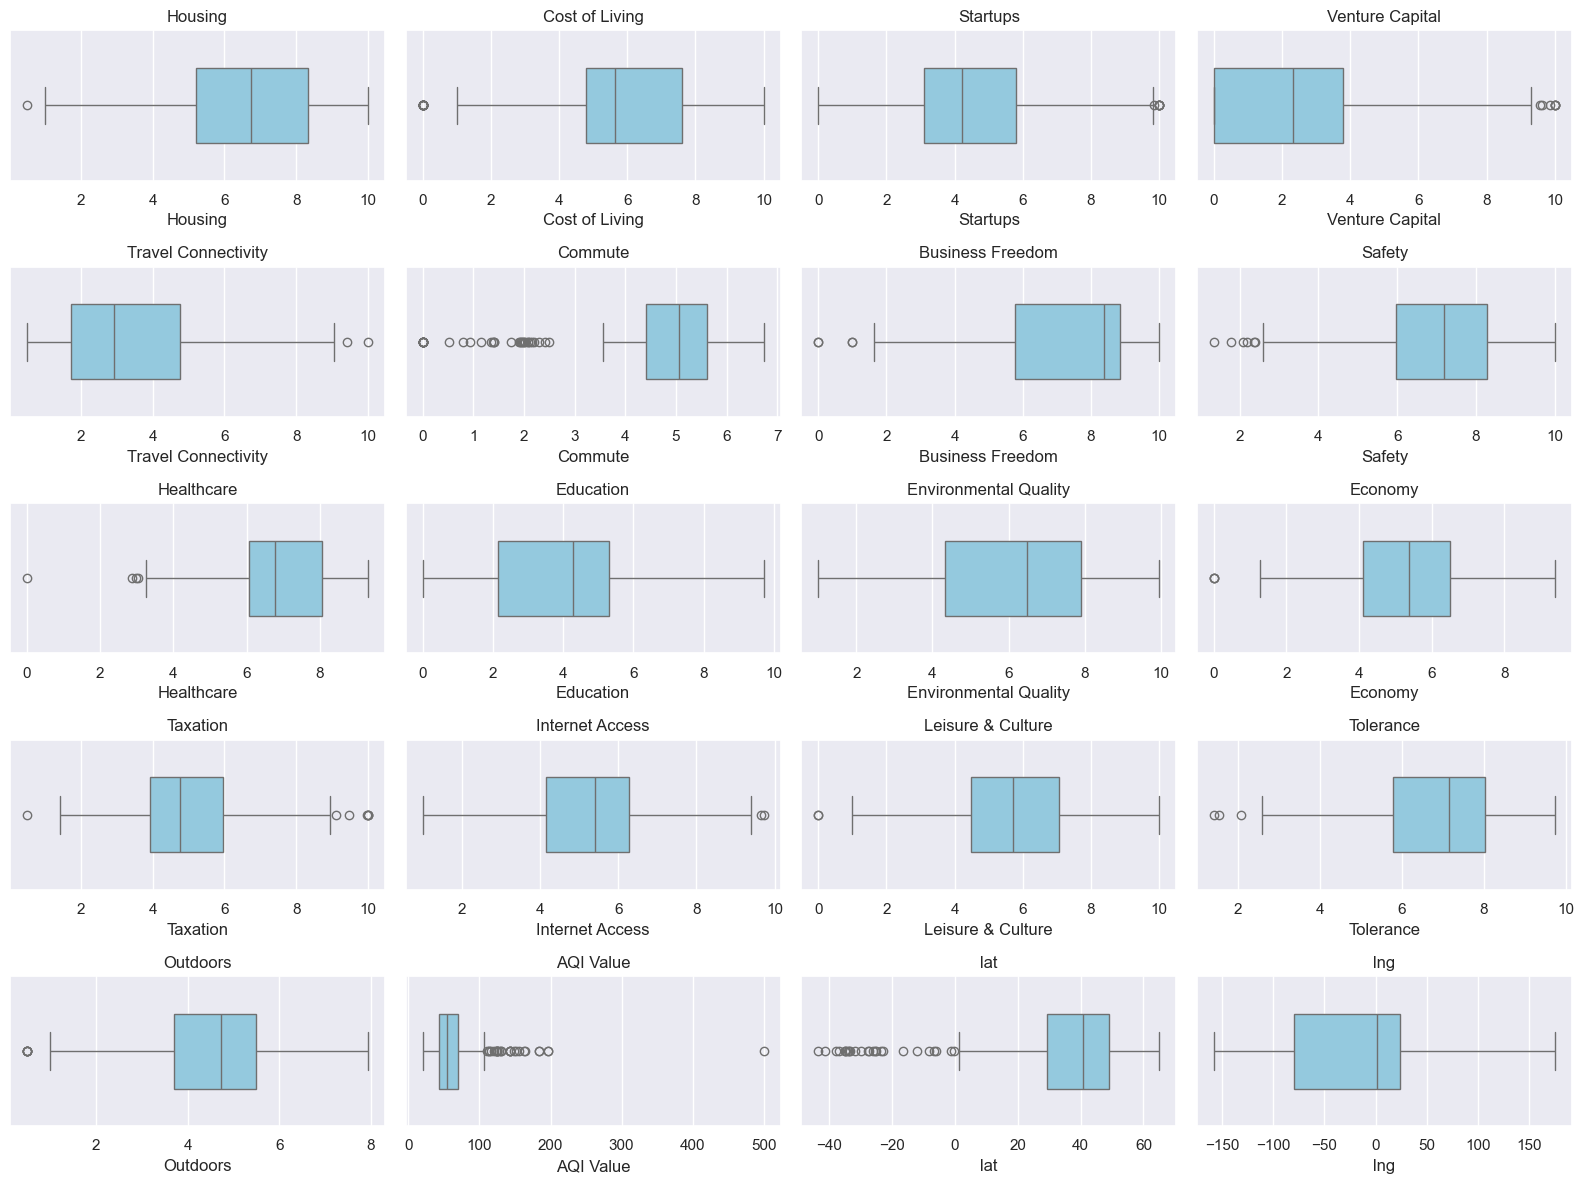

In [61]:
variables = [
    'Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity',
    'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education',
    'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
    'Leisure & Culture', 'Tolerance', 'Outdoors', 'AQI Value', 'lat', 'lng'
]

plt.figure(figsize=(16, 12))

for i, column in enumerate(variables):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=city_df[column], orient='x', width=0.5, color='skyblue')
    plt.title(column)
    plt.tight_layout()

plt.show()

In [62]:
# I will keep all the outliers

#### Dataset 'country_world_happiness_report_2024'

In [63]:
# Hago una copia del dataset
country2024_df = df3.copy()

In [64]:
country2024_df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [65]:
country2024_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [66]:
country2024_df.duplicated().sum()

0

In [67]:
country2024_df = country2024_df.rename(columns={"Country name": "Country"})

In [68]:
country2024_df['Country'] = country2024_df['Country'].replace('Hong Kong S.A.R. of China', 'Hong Kong') 
country2024_df['Country'] = country2024_df['Country'].replace('North Macedonia', 'Macedonia')
country2024_df['Country'] = country2024_df['Country'].replace('State of Palestine', 'Palestine')
country2024_df['Country'] = country2024_df['Country'].replace('Taiwan Province of China', 'Taiwan')

In [69]:
country_lista = list(country2024_df['Country'].unique())
sorted(country_lista)

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedo

In [70]:
country2024_df.isnull().sum()

Country                         0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [71]:
# Columnas que tienen valores faltantes:
paises_con_valores_faltantes = country2024_df[country2024_df['Log GDP per capita'].isna() | country2024_df['Social support'].isna() | country2024_df['Healthy life expectancy'].isna() | country2024_df['Freedom to make life choices'].isna() | country2024_df['Generosity'].isna() | country2024_df['Perceptions of corruption'].isna()]

print("Ciudades con valores faltantes:")
print(paises_con_valores_faltantes[['Country']])

Ciudades con valores faltantes:
        Country
61      Bahrain
87   Tajikistan
102   Palestine


In [72]:
# Voy a eliminar las filas donde "Country" tiene valores nulos
df3_cleaned = country2024_df[~country2024_df['Country'].isin(paises_con_valores_faltantes['Country'])]

df3_cleaned.isnull().sum()

Country                         0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [73]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


#### Dataset country_world_happiness_report_all_years

In [74]:
# Hago una copia del dataset
country_allyears_df = df4.copy()

In [75]:
country_allyears_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [76]:
country_allyears_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [77]:
country_allyears_df.duplicated().sum()

0

In [78]:
country_allyears_df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [79]:
country_allyears_df = country_allyears_df.rename(columns={"Country name": "Country"})

In [80]:
# Voy a eliminar las filas donde "Country name" tiene valores nulos
country_allyears_df = country_allyears_df.dropna(subset=['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                               'Positive affect', 'Negative affect'])
country_allyears_df.isnull().sum()

Country                             0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

#### Combined Datasets countries

In [81]:
country2024_df.head(2)

,Country,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881


In [82]:
# I keep only the desired columns:
country2024_df = country2024_df[['Country', 'Ladder score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [83]:
# I add the column "year" to the df, and the values are 2024:
country2024_df['year'] = 2024

# I change the name of the column:
country2024_df = country2024_df.rename(columns={"Ladder score": "Life Ladder"})
country2024_df = country2024_df.rename(columns={"Healthy life expectancy": "Healthy life expectancy at birth"})

In [84]:
# I change the order of the columns:
nuevo_orden_columnas = ['Country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

country2024_df = country2024_df[nuevo_orden_columnas]
country2024_df.head(2)

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2024,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,2024,7.583,1.908,1.520,0.699,0.823,0.204,0.548


In [85]:
country_allyears_df.head(2)

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237


In [86]:
# I delete the last 2 columns:
country_allyears_df = country_allyears_df.drop(columns=["Positive affect", "Negative affect"])

In [87]:
country_allyears_df.head(5)

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776


In [88]:
# I concatenate both tables:
countries_df = pd.concat([country_allyears_df, country2024_df], ignore_index=True)
countries_df.shape

(2240, 9)

In [89]:
countries_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Ky

In [90]:
# I add the column "Continent" for each country of the list:

continent_dict = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Congo (Kinshasa)': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Ivory Coast': 'Africa',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Australia',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe/Asia',
    'Rwanda': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan Province of China': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia/Europe',
    'Turkiye': 'Asia/Europe',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'Kosovo': 'Europe',
    'China': 'Asia',
    'Hong Kong S.A.R. of China': 'Asia',
    'State of Palestine': 'Asia'
}


countries_df['Continent'] = countries_df['Country'].map(continent_dict)


In [91]:
countries_df.head(5)

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,Asia


In [92]:
# I change the order of the columns:
nuevo_orden_columnas = ['Country', 'Continent', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

countries_df = countries_df[nuevo_orden_columnas]
countries_df.head(5)

,Country,Continent,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,Asia,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882
1,Afghanistan,Asia,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850
2,Afghanistan,Asia,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707
3,Afghanistan,Asia,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731
4,Afghanistan,Asia,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776


In [93]:
countries_df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2007, 2020, 2022, 2023, 2006, 2005, 2024], dtype=int64)

In [94]:
countries_df.head()

,Country,Continent,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,Asia,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882
1,Afghanistan,Asia,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850
2,Afghanistan,Asia,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707
3,Afghanistan,Asia,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731
4,Afghanistan,Asia,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776


### Save the Datasets

In [95]:
city_df.to_csv('city_df.csv', index=False)

In [96]:
countries_df.to_csv('countries_df.csv')